In [57]:
import pandas as pd
import numpy as np

# Baca file CSV dengan separator yang benar
df = pd.read_csv("hiv_prevalence.csv", sep=';', encoding='latin1')

# Tampilkan kolom untuk ngecek
print(df.columns)
print("Columns after stripping whitespace:")
print(df.columns.tolist())
df.columns = df.columns.str.strip()
df.info()

Index(['Country/Region,', 'Adult prevalence', 'Number of people',
       'Annual deaths', 'Year of estimate'],
      dtype='object')
Columns after stripping whitespace:
['Country/Region,', 'Adult prevalence', 'Number of people', 'Annual deaths', 'Year of estimate']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country/Region,   187 non-null    object
 1   Adult prevalence  188 non-null    object
 2   Number of people  188 non-null    object
 3   Annual deaths     188 non-null    object
 4   Year of estimate  187 non-null    object
dtypes: object(5)
memory usage: 7.5+ KB


In [58]:
import numpy as np
import pandas as pd

# Bersihkan nama kolom
df.columns = ['Country_Region', 'Adult_Prevalence', 'Num_People', 'Annual_Deaths', 'Year_of_estimate']

# Strip whitespace
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Ganti tanda '-' jadi NaN
df.replace('-', np.nan, inplace=True)

# Hapus persen & koma, ubah ke float
for col in ['Adult_Prevalence', 'Num_People', 'Annual_Deaths']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('%', '', regex=False)
        df[col] = df[col].str.replace(',', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f"Column '{col}' not found in the DataFrame.")

# Ubah Year_of_estimate ke integer nullable
if 'Year_of_estimate' in df.columns:
    df['Year_of_estimate'] = pd.to_numeric(df['Year_of_estimate'], errors='coerce').astype('Int64')
else:
    print("Column 'Year_of_estimate' not found.")

# Buang baris yang NaN
df_clean = df.dropna()

print(df_clean.to_string(index=False))

               Country_Region  Adult_Prevalence  Num_People  Annual_Deaths  Year_of_estimate
                     Eswatini             28.30    240000.0         3000.0              2024
                      Lesotho             24.10    403000.0         5380.0              2024
                     Botswana             22.60    398500.0         5240.0              2024
                     Zimbabwe             22.10   1660000.0        25600.0              2024
                 South Africa             14.00   9230000.0        77000.0              2024
                      Namibia             13.20    219330.0         3880.0              2024
                       Zambia             12.50   1550000.0        20000.0              2023
                   Mozambique             12.65   2485000.0        59100.0              2024
                       Malawi             11.40   1642570.0        15270.0              2024
            Equatorial Guinea              7.66     74165.0         24

In [59]:
df_clean = df_clean.drop(columns=["Country_Region"])

In [60]:
# Input features dan target
X = df_clean[['Adult_Prevalence', 'Annual_Deaths', 'Year_of_estimate']]
y = df_clean['Num_People']

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [63]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [64]:
import joblib
# Simpan model ke file
joblib.dump(model, 'modelXGboost.pkl')

print("Model berhasil disimpan ke modelXGboost.pkl ✅")

Model berhasil disimpan ke modelXGboost.pkl ✅


In [65]:
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")




Mean Absolute Error (MAE): 90108.24
Root Mean Squared Error (RMSE): 117648.63
R² Score: 0.91


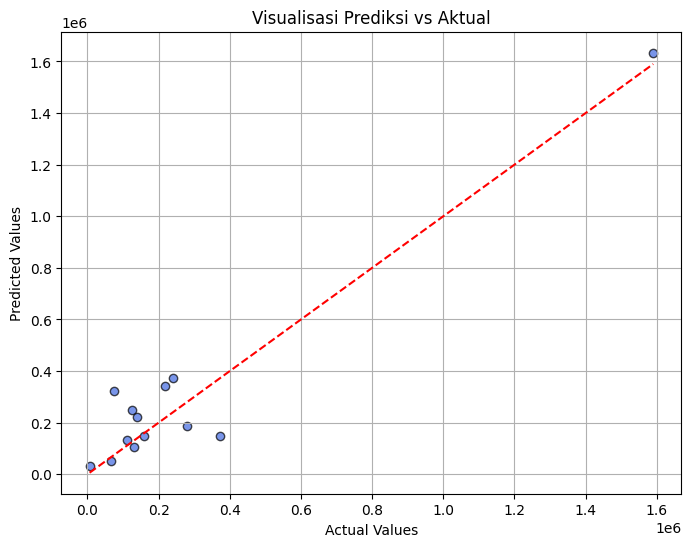

In [66]:
# Visualisasi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='royalblue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Visualisasi Prediksi vs Aktual")
plt.grid(True)
plt.show()

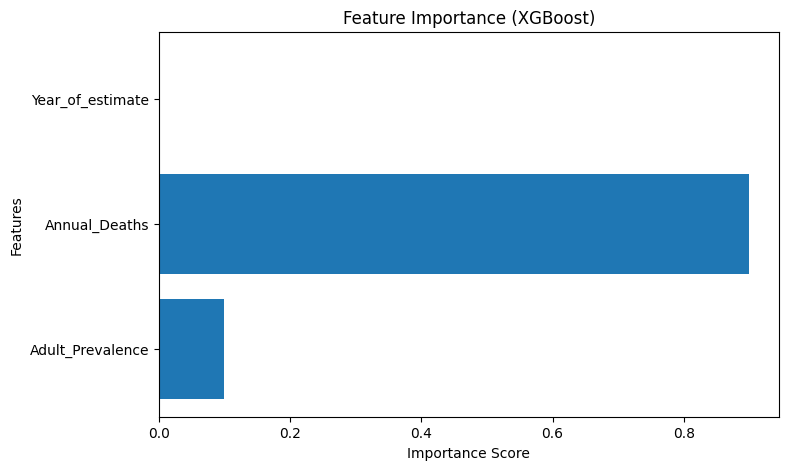

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(X.columns, model.feature_importances_)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()